## opencv-python 简介

opencv 2000 正式发布。目前支持多种语言，包括 c++, python, jave等，跨几乎所有平台。目前正在开发基于 CUDA 和 openCL 的版本，从而可以利用 GPU。

opencv-python 本质上是 Python wrapper around original c++ implementation.

## cv2.imread(), cv2.imshow(), cv2.imwrite()

In [1]:
import cv2

In [2]:
img = cv2.imread('pic/AV.jpg', 0)  # 1 彩色， 0 黑白， -1 包括透明度

In [3]:
cv2.imshow('image',img)   # （窗口名字，读进来的 img 名字）
cv2.waitKey(0)   # 似乎不加这个就不显示啊！
# cv2.waitKey(0)  # 一直显示，程序被锁死，直到按任意键，才进行
# cv2.waitKey(1)  # 一直显示，程序被锁 1 ms，随后可以进行接收后续操作

97

In [4]:
#cv2.destroyAllWindows()  # destroy 所有 window
cv2.destroyWindow('image')  # destroy 指定 window

In [5]:
cv2.imwrite('pic/AV_gray1.png', img)

True

很显然，上述显示图片的方式不太方便，如果我们仅仅想显示一下，看看什么样子，用下边的 matplotlib 更简单一些。

cv2 的好处在于可以通过 waitKey() 来获取键盘输入，从而定义进一步的处理。例如
```python
k = cv2.waitKey(0)
if k == 100;
   do ...
```

## 用 matplotlib.pyplot 来显示
从上边的程序可以看出，cv2.imshow() 用起来比较麻烦。

一个比较好的替代是 matplotlib.pyplot，可以直接显示图片 

In [6]:
import matplotlib.pyplot as plt

In [7]:
img_plt = cv2.imread('pic/AV.jpg', 0)

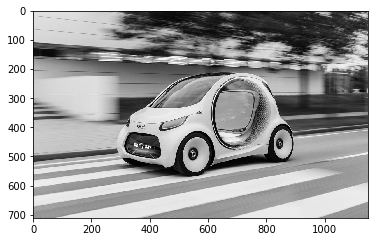

In [8]:
plt.imshow(img_plt, cmap='gray')   

但是如果显示彩色图片，要注意 R G B 顺序。 cv2 读进来的顺序是 B G R， matplotlib 需要 R G B。

因此，如果用 matplotlib 直接显示 cv2 读进来的图片会有问题

In [9]:
img_color = cv2.imread('pic/AV.jpg', 1)

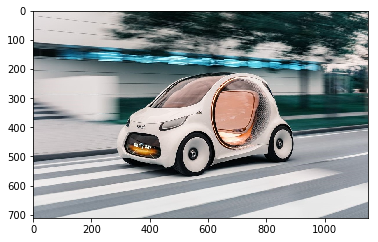

In [10]:
plt.imshow(img_color)

要解决这个问题，就需要改变一下 BGR 的顺序。

方法1： 用数组的方式 img2 = img[:,:,::-1]，即前两维不变，第三维颜色维的顺序颠倒一下

方法2： 用 cv2 自带的函数 img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

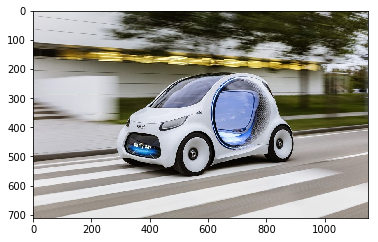

In [11]:
img_color1 = img_color[:,:,::-1]
plt.imshow(img_color1)

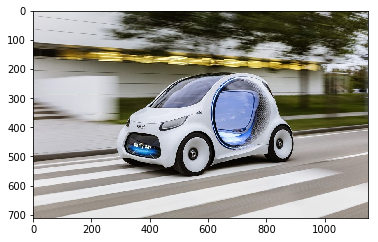

In [12]:
img_color2 = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.imshow(img_color2)

## capture video from camera

In [13]:
cap = cv2.VideoCapture(0)  # 创建一个 VideoCapture 对象，通过 camera index 绑定 camera

In [14]:
while cap.isOpened():
    ret, frame = cap.read()  # 从 camera 中 frame by frame 的读取图片, ret 存储 True or False
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    k = cv2.waitKey(1)  # 等待 1ms 进行后边的工作
    if k == ord('q'):    # ord 返回 Unicode 值，与 chr() 对应
        break
        
cap.release()  # 释放 camera
cv2.destroyAllWindows()

可以 得到 cap 对应 video 的一些属性，
- cap.get(propertyID)
- cap.set(propertyID, value)

其中 ID 取值 0 - 18，比较常用的是前边几个：

- CV_CAP_PROP_POS_MSEC Current position of the video file in milliseconds.
- CV_CAP_PROP_POS_FRAMES 0-based index of the frame to be decoded/captured next.
- CV_CAP_PROP_POS_AVI_RATIO Relative position of the video file: 0 - start of the film, 1 - - end of the film.
- CV_CAP_PROP_FRAME_WIDTH Width of the frames in the video stream.
- CV_CAP_PROP_FRAME_HEIGHT Height of the frames in the video stream.
- CV_CAP_PROP_FPS Frame rate.
- CV_CAP_PROP_FOURCC 4-character code of codec.
- CV_CAP_PROP_FRAME_COUNT Number of frames in the video file.
- CV_CAP_PROP_FORMAT Format of the Mat objects returned by retrieve() .
- CV_CAP_PROP_MODE Backend-specific value indicating the current capture mode.
- CV_CAP_PROP_BRIGHTNESS Brightness of the image (only for cameras).
- CV_CAP_PROP_CONTRAST Contrast of the image (only for cameras).
- CV_CAP_PROP_SATURATION Saturation of the image (only for cameras).

例如获取并设置 frame 的大小

In [15]:
cap.get(3)

0.0

In [16]:
cap.get(4)

0.0

In [50]:
cap.set(3, 100)
cap.set(4, 100)

True

## play video from file

这个实际上就是把 camera index 换成了 video file

In [17]:
import cv2

In [18]:
cap_file = cv2.VideoCapture('pic/gnss.mp4')

In [19]:
while cap_file.isOpened():
    ret, frame = cap_file.read()
    if ret == True:  # 加这个判断很必要，否则 file 播放完了，读不出 frame 会报错
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break

cap_file.release()
cv2.destroyAllWindows()

捕捉 vidoe 我们需要 VideoCapture, 写新的 video 需要一个 VideoWriter 对象

In [4]:
import cv2

In [20]:
cap = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('pic/output.avi', fourcc, 20.0, (640, 480))

while (cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame, 0)
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

## 用 cv2 画基本几何形状

In [21]:
import numpy as np
import cv2

In [22]:
img = np.zeros((512, 512, 3), np.uint8)  # 先设置一个全黑的图片

In [23]:
#img = cv2.line(img, (0,0), (511, 511), (255, 0, 0), 5) # 线段的两个端点，颜色 BGR，粗细程度
#img = cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)  #矩形的左上角与右下角
#img = cv2.circle(img, (447,63), 63, (0, 0, 255), -1) # 圆的圆心和半径， -1 表示闭合空间颜色填充
#img = cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, (255, 255, 255), 1) 
# 椭圆的圆心，长轴，短轴，转角，一周上哪些角度之间是存在弧线的
pts = np.array([[10,5], [20, 30], [70, 20], [50, 10]], np.int32)
img = cv2.polylines(img, [pts], True, (0, 255, 255))  # True 可以让多边形形成闭合，否则缺条边

In [24]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 添加文字

用 cv2.putText 命令

In [25]:
font = cv2.FONT_HERSHEY_SIMPLEX
img_text = cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2, cv2.LINE_AA)
# 文字，起始位置，字体，大小，颜色，粗细，线型

In [26]:
cv2.imshow('image',img_text)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 响应鼠标点击

cv2 中定义的驱动事件有很多，可以通过如下命令查看：

In [27]:
import cv2
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### 简单例子

鼠标左键双击，就在点击的位置画个蓝色的圆

In [1]:
import cv2
import numpy as np

In [28]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x,y), 100, (255, 0, 0), -1)
    
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(10) == ord('q'):
        break

cv2.destroyAllWindows()

### 复杂例子

鼠标按下去，拖动画矩形或者实心圆点，鼠标按键弹起来之后，保持已画图案。

In [3]:
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [7]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:    # 27 对应 ESC
        break

cv2.destroyAllWindows()

In [9]:
cv2.destroyWindow('hello')

## 通过滑动条改变窗口颜色

cv2.createTrackbar()

cv2.getTrackbarPose()

In [8]:
import cv2
import numpy as np

In [9]:
def nothing(x):
    pass

In [14]:
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')   # 这是已经出现了窗口

In [15]:
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

In [16]:
switch = '0: OFF \n 1: ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

In [18]:
while 1:
    cv2.imshow('image', img)    # 这里才真正出现了合适大小的窗口以及 trackbar
    if cv2.waitKey(1) == ord('q'):
        break
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()        

## 对于 image 的基本操作

### 修改 pixel 值

In [19]:
import cv2
import numpy as np

In [20]:
img = cv2.imread('pic/AV.jpg')

In [26]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
px = img[484,378]
print(px)  # 获取 484 行， 378 列的三维颜色值 B G R

[240 186  85]


In [27]:
blue = img[484, 378, 0]
print(blue)  # 获取该位置的蓝色 channel 的值

240


In [28]:
img[484, 378] = [0, 0, 0]  # 可以在该位置看到一个黑点

In [29]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 获取 Image property

In [30]:
img.shape  # 三维的大小

(711, 1149, 3)

In [31]:
img.size  # 元素的总数

2450817

In [32]:
711 * 1149 * 3

2450817

In [33]:
img.dtype  # 元素数据类型

dtype('uint8')

### 分解、融合颜色 channel

In [38]:
b, g, r = cv2.split(img)  # 自动分解 img 的颜色 channel

In [39]:
img = cv2.merge((r,g,b))

In [40]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### padding

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

BLUE = [255,0,0]

img1 = cv2.imread('pic/opencv_log.png')
img1 = img1[10:-10, 10:-10, :]  # 原图片空白太多，看不出来效果

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE) # 上下左右宽度，单位是 pixel
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)


cv2.imshow('image', replicate)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图片叠加

在对图片 array 做运算时，既可以用 opencv 本身的函数，也可以通过 numpy 运算。

两者有时会有一些细微差别。

例如两个 array 相加，用 cv2.add() 如果和超过 255 就截断；而 numpy 的相加实际上是取 modulo

In [1]:
import numpy as np
import cv2

In [52]:
x = np.uint8([250])
y = np.uint8([10])

In [53]:
cv2.add(x,y)  # uint8 最大是 255，超过就截断

array([[255]], dtype=uint8)

In [54]:
x + y  # 最大是 255，超过就从头循环，也就是 modulo 运算

array([4], dtype=uint8)

对比以上两种运算，似乎还是 cv2.add() 更适合，至少不会发生太离谱的错误。

加权叠加，可以理解成透明度不同

In [3]:
img1 = cv2.imread('pic/opencv_log.png')
img2 = cv2.imread('pic/messi.png')

In [4]:
img1.shape

(185, 450, 3)

In [5]:
img2.shape

(280, 450, 3)

In [8]:
img2 = img2[0:185, :, :]
img2.shape

(185, 450, 3)

In [9]:
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0) # 公式： img1 * a1 + img2 * a2 + a3

In [ ]:
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()